Epoch 0: Loss = 1.3929
Epoch 10: Loss = 1.3870
Epoch 20: Loss = 1.3843
Epoch 30: Loss = 1.3831
Epoch 40: Loss = 1.3812

Классификационный отчёт:
              precision    recall  f1-score   support

           0       0.23      0.08      0.12       162
           1       0.21      0.11      0.14       150
           2       0.12      0.07      0.09       137
           3       0.22      0.58      0.32       151

    accuracy                           0.21       600
   macro avg       0.20      0.21      0.17       600
weighted avg       0.20      0.21      0.17       600



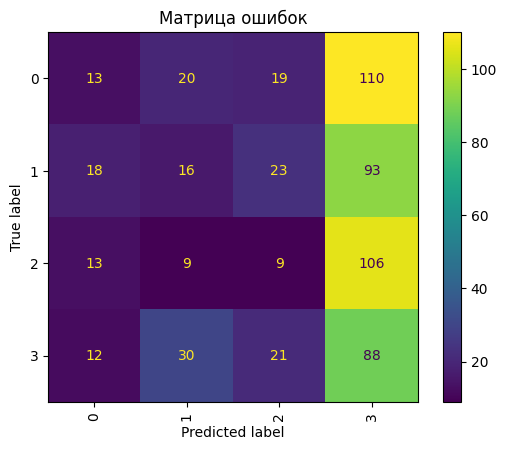

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Загрузка данных
df = pd.read_csv("sample_data/Global_Cybersecurity_Threats_2015-2024.csv")

# Удаляем пропущенные значения
df = df.dropna()

# Названия колонок
target_col = 'Security Vulnerability Type'

# Автоматически определим строковые колонки и закодируем
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Кодируем целевую переменную
target_encoder = LabelEncoder()
df[target_col] = target_encoder.fit_transform(df[target_col])

# Разделяем данные
X = df.drop(target_col, axis=1)
y = df[target_col]

# Масштабируем признаки
X = StandardScaler().fit_transform(X)

# Делим выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Преобразуем данные в тензоры
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_tensor  = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Архитектура сети
class CyberThreatNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CyberThreatNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.model(x)

model = CyberThreatNN(input_size=X.shape[1], num_classes=len(set(y)))
criterion = nn.CrossEntropyLoss()

# Обучение
optimizer = optim.Adam(model.parameters(), lr=0.0005)
epochs = 50

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Тестирование
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = predictions.argmax(dim=1)
    print("\nКлассификационный отчёт:")
    print(classification_report(y_test_tensor, predicted_classes))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_tensor, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title("Матрица ошибок")
plt.show()

In [30]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

Epoch 0: Loss = 1.3819
Epoch 1: Loss = 1.3814
Epoch 2: Loss = 1.3810
Epoch 3: Loss = 1.3798
Epoch 4: Loss = 1.3815
Epoch 5: Loss = 1.3805
Epoch 6: Loss = 1.3812
Epoch 7: Loss = 1.3815
Epoch 8: Loss = 1.3807
Epoch 9: Loss = 1.3820
Epoch 10: Loss = 1.3802
Epoch 11: Loss = 1.3807
Epoch 12: Loss = 1.3822
Epoch 13: Loss = 1.3794
Epoch 14: Loss = 1.3812
Epoch 15: Loss = 1.3815
Epoch 16: Loss = 1.3790
Epoch 17: Loss = 1.3800
Epoch 18: Loss = 1.3803
Epoch 19: Loss = 1.3802
Epoch 20: Loss = 1.3785
Epoch 21: Loss = 1.3778
Epoch 22: Loss = 1.3788
Epoch 23: Loss = 1.3786
Epoch 24: Loss = 1.3772
Epoch 25: Loss = 1.3779
Epoch 26: Loss = 1.3769
Epoch 27: Loss = 1.3771
Epoch 28: Loss = 1.3776
Epoch 29: Loss = 1.3774
Epoch 30: Loss = 1.3754
Epoch 31: Loss = 1.3769
Epoch 32: Loss = 1.3788
Epoch 33: Loss = 1.3776
Epoch 34: Loss = 1.3759
Epoch 35: Loss = 1.3766
Epoch 36: Loss = 1.3769
Epoch 37: Loss = 1.3761
Epoch 38: Loss = 1.3738
Epoch 39: Loss = 1.3761
Epoch 40: Loss = 1.3736
Epoch 41: Loss = 1.3774
Ep

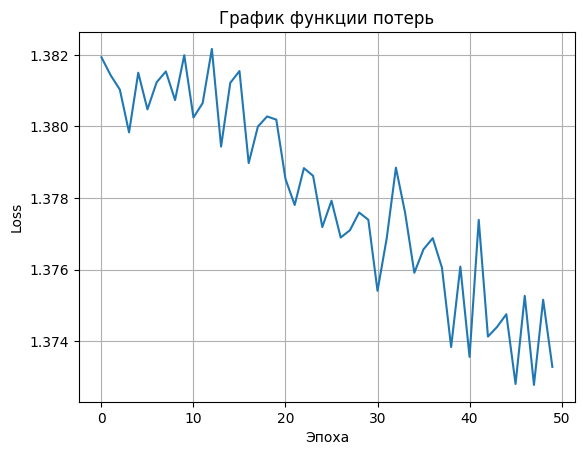

In [31]:
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("График функции потерь")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [32]:
import numpy as np
print(np.any(np.isnan(X_train)), np.any(np.isinf(X_train)))

False False


In [33]:
print("Outputs shape:", outputs.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("Loss:", loss.item())

Outputs shape: torch.Size([2400, 4])
y_train_tensor shape: torch.Size([2400])
Loss: 1.3732821941375732


In [34]:
print("Predicted class indices:", outputs.argmax(dim=1)[:10])
print("True class indices:", y_train_tensor[:10])

Predicted class indices: tensor([1, 1, 3, 2, 0, 3, 3, 3, 1, 2])
True class indices: tensor([3, 1, 2, 0, 3, 3, 2, 2, 1, 0])


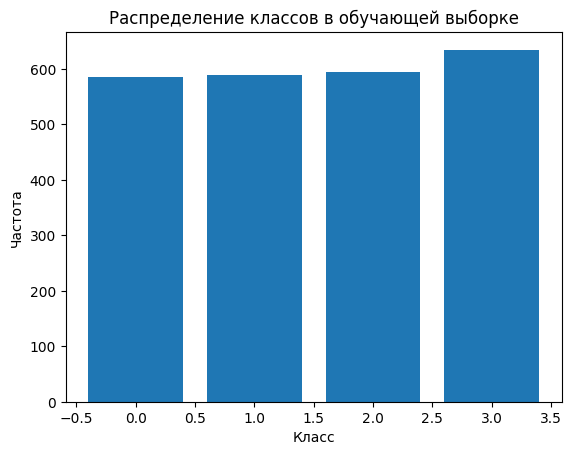

Частоты по классам: {np.int64(0): np.int64(585), np.int64(1): np.int64(588), np.int64(2): np.int64(593), np.int64(3): np.int64(634)}


In [35]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(range(len(unique)), counts)
plt.title("Распределение классов в обучающей выборке")
plt.xlabel("Класс")
plt.ylabel("Частота")
plt.show()

print("Частоты по классам:", dict(zip(unique, counts)))

In [36]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

In [37]:
print("Min:", X_train_tensor.min().item(), "Max:", X_train_tensor.max().item(), "Mean:", X_train_tensor.mean().item())

Min: -1.7388944625854492 Max: 1.727204442024231 Mean: 0.0013183826813474298


In [38]:
with torch.no_grad():
    sample_out = model(X_train_tensor[:5])
    print(sample_out)

tensor([[ 0.0744,  0.1195, -0.0519, -0.0153],
        [-0.1465,  0.1194, -0.0140, -0.0514],
        [-0.1167, -0.4341, -0.1101,  0.2017],
        [ 0.1524, -0.0907, -0.1403, -0.1366],
        [-0.0140,  0.0699,  0.0814, -0.0738]])


In [39]:
accuracies = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Accuracy
    predicted = outputs.argmax(dim=1)
    accuracy = (predicted == y_train_tensor).float().mean().item()
    accuracies.append(accuracy)

    print(f"Epoch {epoch}: Loss = {loss.item():.4f}, Accuracy = {accuracy:.4f}")

Epoch 0: Loss = 1.3745, Accuracy = 0.2971
Epoch 1: Loss = 1.3754, Accuracy = 0.2954
Epoch 2: Loss = 1.3750, Accuracy = 0.2962
Epoch 3: Loss = 1.3745, Accuracy = 0.2942
Epoch 4: Loss = 1.3719, Accuracy = 0.3000
Epoch 5: Loss = 1.3725, Accuracy = 0.3033
Epoch 6: Loss = 1.3731, Accuracy = 0.2929
Epoch 7: Loss = 1.3715, Accuracy = 0.3137
Epoch 8: Loss = 1.3740, Accuracy = 0.2933
Epoch 9: Loss = 1.3697, Accuracy = 0.3050
Epoch 10: Loss = 1.3707, Accuracy = 0.2992
Epoch 11: Loss = 1.3706, Accuracy = 0.3046
Epoch 12: Loss = 1.3689, Accuracy = 0.3117
Epoch 13: Loss = 1.3754, Accuracy = 0.2846
Epoch 14: Loss = 1.3690, Accuracy = 0.3092
Epoch 15: Loss = 1.3711, Accuracy = 0.3013
Epoch 16: Loss = 1.3729, Accuracy = 0.2804
Epoch 17: Loss = 1.3710, Accuracy = 0.3162
Epoch 18: Loss = 1.3727, Accuracy = 0.2921
Epoch 19: Loss = 1.3707, Accuracy = 0.3033
Epoch 20: Loss = 1.3683, Accuracy = 0.3058
Epoch 21: Loss = 1.3691, Accuracy = 0.3025
Epoch 22: Loss = 1.3689, Accuracy = 0.2958
Epoch 23: Loss = 1.37

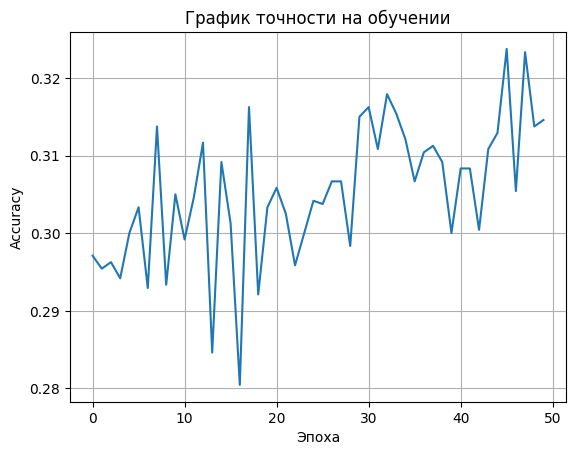

In [40]:
plt.plot(accuracies)
plt.title("График точности на обучении")
plt.xlabel("Эпоха")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

Средняя accuracy на обучении ≈ 20% (при 7 классах — это чуть выше случайного угадывания: 1/7 ~ 14.3\%).
Наличие скачков и нестабильности — явный признак, что модель пока не научилась извлекать устойчивые зависимости из признаков

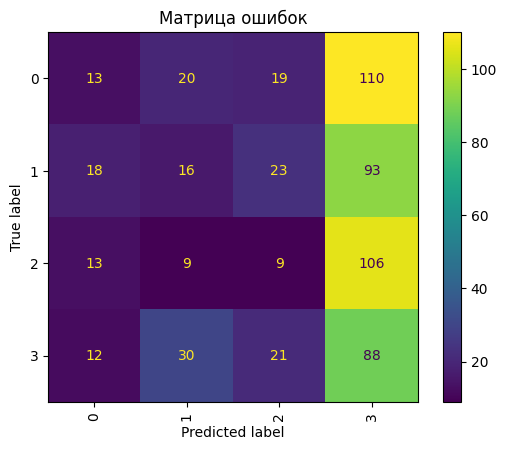

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_encoder.classes_)
disp.plot(xticks_rotation='vertical')
plt.title("Матрица ошибок")
plt.show()

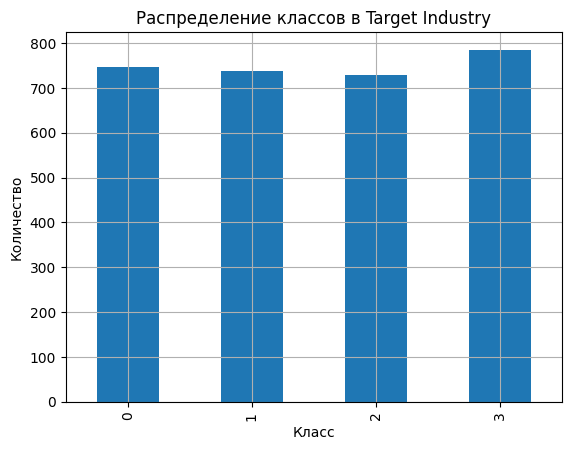

In [42]:
import matplotlib.pyplot as plt

pd.Series(y).value_counts().sort_index().plot(kind='bar')
plt.title("Распределение классов в Target Industry")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.grid(True)
plt.show()

In [43]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Рассчитываем веса классов
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

# Используем их в функции потерь
criterion = nn.CrossEntropyLoss(weight=weights_tensor)

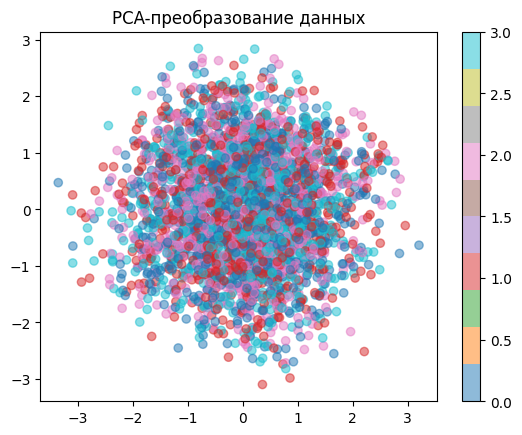

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.5)
plt.title("PCA-преобразование данных")
plt.colorbar()
plt.show()